# VECOTRA : Constrained Optimal Transport
## Implementation of constrained dynamic.
This example shows a edge capacity constraint on one mode of transport.

* constributors:
* * AAI
* * CDB

In [12]:
'''
import packages
'''
import importlib
import networkx as nx
import pandas as pd

from vecotra import *
from init import *
import generate_planar as gpl
import plotting as pl

import warnings

warnings.filterwarnings('ignore')

In [2]:
# settings
p = 0.0 
alpha = 2 # restituiton parameter
pflux = 1.8 # tune topology
seedG = 11 #seed for Graph
seedF = 1 #seed for forcing
seed_dyn = seedG + seedF #seed for dyn

# dyn params
verbose = 1
plot_cost = True
N = 50
weigth = 10.
out_folder = './data/output/'

flag_out_results = bool(1)
flag_plot_results = bool(1)

#name = 'pln'
# save the results
#label = ('_').join([str(name),str(N),str(p),str(pflux)])
#label

In [3]:
clipping_mode = False
constraint_mode = False

In [4]:
vecotra_params = VECOTRA(seedG, seedF, 
                         pflux,N, p, weigth, out_folder,
                         alpha, verbose,
                         constraint_mode, clipping_mode, plot_cost)

In [5]:
'''
Generate forcing
'''
#nodes  = list(graph.nodes())
graph,length, forcing, comm_list, transit_list = vecotra_params.generate_forcing()

n_center: 2
destination:[2] -- weight:10.0
forcing: imported from file
Ncom: 49  Ntransit: 50
coordinates: imported


In [6]:
print(f"# nodes:{graph.number_of_nodes()}")
print(f"# edges:{graph.number_of_edges()}")

# nodes:50
# edges:121


In [7]:
'''
save optimal results into dict
'''
opttdens, optpot, optflux_norm, minCost = {},{},{},{}
minCost_list,optflux, min_g_list = {},{},{}

In [8]:
'''
----------------------------------------
Run dynamics
----------------------------------------
'''
ref_pct = 70
plot_cost = 1
coupling = 'l2'
opt_setting = 'length'

print('-'*30)
print('Unconstrained MultiOT')
print('-'*30)
model = 'old'
constraint_mode = False
clipping_mode = False
capacity = 1e20 
model = 'Unconstrained'
if opt_setting == 'length':
    vecotra_params.exec_uconstr(capacity, constraint_mode, clipping_mode)
    opttdens[model], optpot[model],  optflux_norm[model], minCost[model], minCost_list[model],optflux[model], min_g_list[model] = vecotra_params.export_results()

  
print('-'*30)
print('capacity Constrained ')
print('-'*30)
model = 'Constrained'
constraint_mode = True
capacity_val = np.percentile(opttdens['Unconstrained'],ref_pct)
nedge = graph.number_of_edges()
capacity = np.full(nedge, capacity_val)
if opt_setting == 'length':
    vecotra_params.exec_constr(capacity)
    opttdens[model], optpot[model],  optflux_norm[model], minCost[model], minCost_list[model],optflux[model], min_g_list[model] = vecotra_params.export_results()

print('-'*30)
print('Clip')
print('-'*30)    
model = 'Clip'
constraint_mode = False
clipping_mode = True
if opt_setting == 'length':
    vecotra_params.exec_clip(capacity)
    opttdens[model], optpot[model], optflux_norm[model], minCost[model], minCost_list[model],optflux[model], min_g_list[model] = vecotra_params.export_results()

print('-'*30)
flux = {}
for k in optflux.keys():
    flux[k] = np.copy(optflux[k])

algos = list(flux.keys())
flux_norm1 = {a: np.linalg.norm(flux[a], axis=1,ord = 1) for a in algos} 

------------------------------
Unconstrained MultiOT
------------------------------
--unconstrained mode:False--clip mode:False

dynamics...
cost: 14.358754259879674  - N_real: 0 - Best cost 100000000000000.0
cost: 14.123670644689062  - N_real: 1 - Best cost 14.358754259879674
cost: 14.409174330681777  - N_real: 2 - Best cost 14.123670644689062
cost: 13.645949531904655  - N_real: 3 - Best cost 14.123670644689062
cost: 14.337815847914914  - N_real: 4 - Best cost 13.645949531904655
------------------------------
capacity Constrained 
------------------------------
--constrained mode:True
capacity:46.41588607441605

dynamics...
cost: 15.870638284033031  - N_real: 0 - Best cost 100000000000000.0
cost: 15.599795188177028  - N_real: 1 - Best cost 15.870638284033031
cost: 16.30888858830594  - N_real: 2 - Best cost 15.599795188177028
cost: 15.637339514358484  - N_real: 3 - Best cost 15.599795188177028
cost: 15.949491280688482  - N_real: 4 - Best cost 15.599795188177028
------------------------

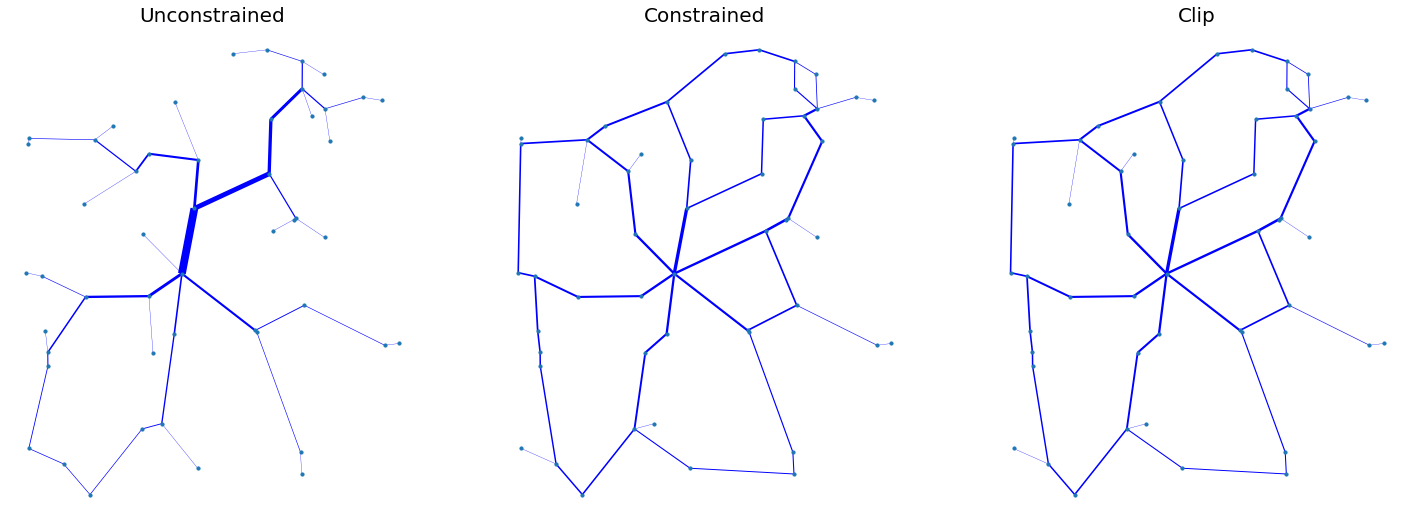

<Figure size 432x288 with 0 Axes>

In [9]:
if flag_plot_results:
    algo_labels = {a:a for a in flux.keys()}
    pl.plot_graphs(graph,flux_norm1,algo_labels= algo_labels,w1 = 0.03, figsize=(25,9),ns = 10)

# cost

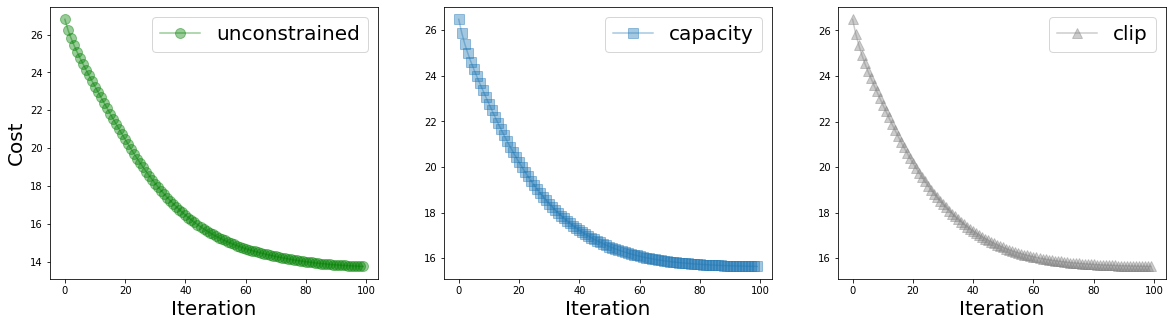

In [10]:
pl.plot_cost(np.array(minCost_list['Unconstrained']), np.array(minCost_list['Constrained']), np.array(minCost_list['Clip']))

# $\mu_e$ behavior

<Figure size 1008x432 with 0 Axes>

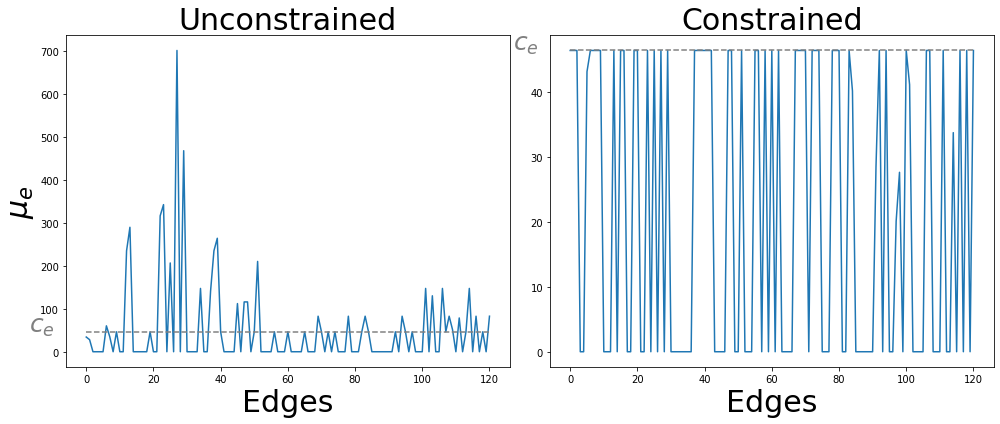

In [11]:
pl.plot_g(np.array(opttdens['Unconstrained']),np.array(opttdens['Constrained']), capacity)